In [1]:
'''
YOUR TASKS:

1. SPECIFY THE URL OR PATH TO YOUR DATA, REMEMBER - YOU FIRST HAVE TO DOWNLOAD IT.
2. CLICK RUN ALL OR RESTART AND RUN ALL BUTTON TO RUN THE CODE. THIS CODE RUNS IN A CHRONOLOGICAL MANNER - THE TOP BLOCKS MUST PRECEED THE BOTTOM ONES,
                                                                                                            i.e. don't run stuff from the bottom first, otherwise the code won't work properly.
3. NEAR THE END OF THE CODE, YOU WILL SEE YOUR EPOCH METRICS, AS I STATED IN CLASS, YOU WANT THE ACCURACY TO APPROACH 100% =1.0 AND THE LOSS TO APPROACH 0
4. IN CASE IF YOUR MODEL IS STRUGGLING TO REACH THESE RESULTS AND IS INSTEAD STUCK AT A LOW ACCURACY, NAVIGATE TO THE BLOCK OF CODE WITH HYPERPARAMETERS AND CHANGE THESE NUMBERS,
THEN, TRY RUNNING THE CODE AGAIN AND SEE HOW YOUR MODEL IS PERFORMING; REPEAT UNTIL YOU REACH A PLAUSIBLE RESULT (ONE THAT IS BETTER THAN A COIN TOSS IN TERMS OF PREDICTION ACCURACY IN THE WORST CASE)
5. SAVE YOUR RESULTS => THE CODE INCLUDES A BLOCK WHICH WILL SAVE YOUR MODEL TO A .h5 FILE,
 - KEEP THE OUTPUTS OF THIS NOTEBOOK AS WELL, YOU WILL WANT TO DEMONSTRATE HOW THE TRAINING PROCESS WENT.
 - BE MINDFUL OF THE TIME YOU HAVE IF YOU CHOOSE TO USE GOOGLE COLLABORATORY INSTEAD OF YOUR OWN MACHINE AS THEIR VMs ONLY OFFER YOU A COUPLE OF HOURS OF USAGE.
'''

"\nYOUR TASKS:\n\n1. SPECIFY THE URL OR PATH TO YOUR DATA, REMEMBER - YOU FIRST HAVE TO DOWNLOAD IT.\n2. CLICK RUN ALL OR RESTART AND RUN ALL BUTTON TO RUN THE CODE. THIS CODE RUNS IN A CHRONOLOGICAL MANNER - THE TOP BLOCKS MUST PRECEED THE BOTTOM ONES,\n                                                                                                            i.e. don't run stuff from the bottom first, otherwise the code won't work properly.\n3. NEAR THE END OF THE CODE, YOU WILL SEE YOUR EPOCH METRICS, AS I STATED IN CLASS, YOU WANT THE ACCURACY TO APPROACH 100% =1.0 AND THE LOSS TO APPROACH 0\n4. IN CASE IF YOUR MODEL IS STRUGGLING TO REACH THESE RESULTS AND IS INSTEAD STUCK AT A LOW ACCURACY, NAVIGATE TO THE BLOCK OF CODE WITH HYPERPARAMETERS AND CHANGE THESE NUMBERS,\nTHEN, TRY RUNNING THE CODE AGAIN AND SEE HOW YOUR MODEL IS PERFORMING; REPEAT UNTIL YOU REACH A PLAUSIBLE RESULT (ONE THAT IS BETTER THAN A COIN TOSS IN TERMS OF PREDICTION ACCURACY IN THE WORST CASE)\n5. SAVE YOUR R

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import time

In [3]:
# Function to read the data
def read_data(filename):
    data = pd.read_csv(filename)

    # Extract features
    features = data.iloc[:,1 :-1].values

    # Extract and encode labels
    label_encoder = LabelEncoder()
    data.iloc[:, -1] = label_encoder.fit_transform(data.iloc[:, -1])
    labels = data.iloc[:, -1].values

    return features, labels
# Read the data
data_url = 'https://raw.githubusercontent.com/vivekpatel0512/Data/main/JoyData.csv'# enter your data URL or PATH here in enclosed in " " IF YOUR NOTEBOOK IS IN THE SAME FOLDER AS data.csv, which is your data you downloaded, then this will run as it is.
                    # otherwise, you have to specify a different path or url
x, y = read_data(data_url)

<ipython-input-3-ff00230b374c>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, -1] = label_encoder.fit_transform(data.iloc[:, -1])


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/vivekpatel0512/Data/main/JoyData.csv') ## THIS AND THE BLOCK OF CODE IMMEDIATELY AFTER THIS ARE OPTIONAL, THIS IS INTENDED TO HELP YOU VISUALIZE YOUR DATASET

In [5]:
df # AS STATED ABOVE, YOU MAY REMOVE THIS AND THE ABOVE BLOCKS OF CODE IF YOU LIKE, THIS WILL HAVE NO

,Time (Seconds),x-rotation,y-rotation,z-rotation,x-position,y-position,z-position,label
0,0.000000,63.242401,13.856607,47.600426,0.804732,1.225692,-0.277659,Sit_VidCall_Phone
1,0.008333,64.519630,12.121723,47.820721,0.804479,1.225521,-0.277455,Sit_VidCall_Phone
2,0.016667,63.550705,14.043080,47.241371,0.803371,1.224967,-0.277906,Sit_VidCall_Phone
3,0.025000,65.117119,12.348774,48.841778,0.803298,1.225002,-0.277317,Sit_VidCall_Phone
4,0.033333,64.607178,12.238139,48.339672,0.802831,1.224477,-0.277624,Sit_VidCall_Phone
...,...,...,...,...,...,...,...,...
80459,30.441667,130.977570,-33.077209,-127.370117,-0.434150,1.221795,0.108877,Walk_WebBrowse_Tablet
80460,30.450000,130.771866,-33.228359,-127.650749,-0.428528,1.221354,0.110072,Walk_WebBrowse_Tablet
80461,30.458333,130.673172,-33.362461,-127.815765,-0.422856,1.220984,0.111184,Walk_WebBrowse_Tablet
80462,30.466667,130.473785,-33.514874,-128.028564,-0.417119,1.220705,0.112224,Walk_WebBrowse_Tablet


In [6]:
x.shape ### IN THE FOLLOWING PARTS OF THE CODE, MAKE SURE THAT EVERYTING IS LOADED CORRECTLY, YOU SHOULD HAVE A DATASET WITH 22 CLASSES, (n-rows, 6 columns, later another dimension will be added here)

(80464, 6)

In [7]:
y.shape

(80464,)

In [8]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [9]:
x[0]

array([63.242401, 13.856607, 47.600426,  0.804732,  1.225692, -0.277659])

In [10]:
y[0] # these were sample rows from the data for your to inspect, you should see a 6 by 1 vector above and a single value here

0

In [11]:
# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [12]:
# Reshape the data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [13]:
# Determine the input shape and number of classes
input_shape = (x_train.shape[1], 1)
num_classes = len(np.unique(y))

In [14]:
num_classes # must have 22

22

In [15]:
input_shape

(6, 1)

In [16]:
x_train.shape

(57933, 6, 1)

In [17]:
y_train.shape

(57933,)

In [18]:
x_train[0]

array([[36.880024],
       [19.531965],
       [69.420296],
       [ 0.828858],
       [ 1.253485],
       [-1.363782]])

In [19]:
y_train[0]

21

In [20]:
# Transformer Encoder function with dropout and L2 regularization
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1, l2_reg=0.01):

    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed-forward network with dropout and L2 regularization
    x = layers.Dense(ff_dim, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(res)
    x = layers.Dropout(dropout)(x)

    x = layers.Dense(ff_dim, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(x)
    x = layers.Dropout(dropout)(x)



    x = layers.Dense(ff_dim, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(x)
    x = layers.Dropout(dropout)(x)

    x = layers.Dense(inputs.shape[-1], activation = 'softmax')(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    return x + res

In [21]:
# Transformer Decoder function
def transformer_decoder(inputs, enc_outputs, head_size, num_heads, ff_dim, dropout=0.1, l2_reg=0.01):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(res, enc_outputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = x + res

    # Feed-forward network
    x = layers.Dense(ff_dim, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(x)
    x = layers.Dropout(dropout)(x)

    x = layers.Dense(ff_dim, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(x)
    x = layers.Dropout(dropout)(x)

    '''
    YOU MAY WANT TO ADD OR REMOVE THESE TWO LINES HERE PRECISELY IN THIS PART OF THE CODE, PAY ATTENTION TO THE INDENTATION, PYTHON REQUIRES CONSISTENCY IN ORDER FOR THE CODE TO RUN CORRECTLY
    x = layers.Dense(ff_dim, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(x)
    x = layers.Dropout(dropout)(x)

    '''

    x = layers.Dense(ff_dim, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(x)
    x = layers.Dropout(dropout)(x)

    x = layers.Dense(inputs.shape[-1], activation = 'softmax')(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    return x + res


In [22]:
# Build the model
def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0, l2_reg=0):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    # Encoder
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout, l2_reg)


    # Decoder
    decoder_input = keras.Input(shape=input_shape)
    dec = decoder_input
    for _ in range(num_transformer_blocks):
        dec = transformer_decoder(dec, x, head_size, num_heads, ff_dim, dropout, l2_reg)

    x = layers.Flatten()(x)
    dec = layers.Flatten()(dec)
    x = layers.Concatenate()([x, dec])

    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model([inputs, decoder_input], outputs)
    return model

In [23]:
# Define the hyperparameters
"""
# THIS IS THE PART YOU SHOULD PLAY AROUND WITH
# YOU MAY REDUCE THESE NUMBERS IF YOUR MACHINE IS OTHERWISE INCAPABLE OF RUNNING THE CODE"""

head_size = 4
num_heads = 4
ff_dim = 256
num_transformer_blocks = 4
mlp_units = [256]
dropout = 0.1
mlp_dropout = 0.1
initial_lr = 0.001
l2_reg=0.01

In [24]:
# Build the model
model = build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout, mlp_dropout)

In [25]:
# Create the optimizer with the initial learning rate
optimizer = Adam(learning_rate=initial_lr)

In [26]:
# Compile the model
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [27]:
# Create the ReduceLROnPlateau callback
lr_callback = ReduceLROnPlateau(factor=0.1, patience=50)

In [28]:
# Record the start time
start_time = time.time()

In [30]:
model.fit([x_train, x_train], y_train,
          batch_size=64,
          epochs=3,
          validation_data=([x_val, x_val], y_val),
          callbacks=[lr_callback])

Epoch 1/3
906/906 [==============================] - 55s 60ms/step - loss: 0.0460 - accuracy: 0.9843 - val_loss: 0.0360 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 2/3
906/906 [==============================] - 57s 63ms/step - loss: 0.0471 - accuracy: 0.9845 - val_loss: 0.0475 - val_accuracy: 0.9832 - lr: 0.0010
Epoch 3/3
906/906 [==============================] - 60s 66ms/step - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.0386 - val_accuracy: 0.9873 - lr: 0.0010


In [31]:
# Record the end time
end_time = time.time()

In [32]:
# Calculate the total running time
running_time = end_time - start_time
print("Total Running Time: {:.2f} seconds".format(running_time))

Total Running Time: 3027.81 seconds


In [33]:
# Evaluate the model
loss, accuracy = model.evaluate([x_test, x_test], y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

252/252 [==============================] - 5s 21ms/step - loss: 0.0376 - accuracy: 0.9892
Test loss: 0.03762999549508095, Test accuracy: 0.9891884922981262


In [41]:
y_pred = model.predict([x_test,x_test])
y_pred = np.argmax(y_pred, axis=1)

252/252 [==============================] - 5s 21ms/step


In [42]:
cm = confusion_matrix(y_test, y_pred)

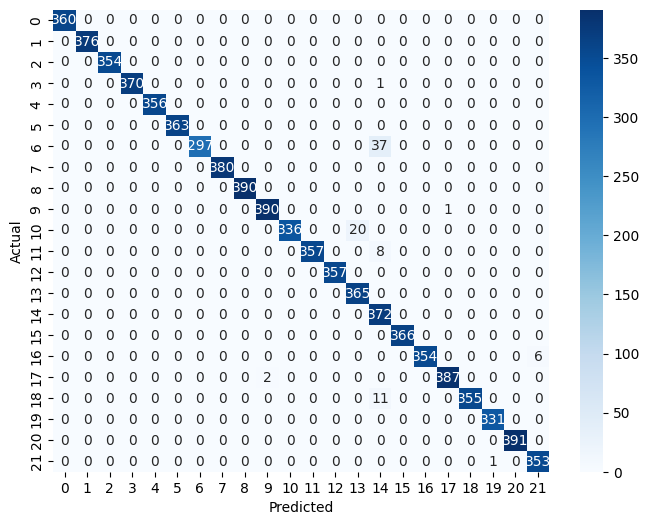

In [43]:
# Plot the confusion matrix
class_names = np.unique(y)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [44]:
# Save the trained model
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
